# Modeling

In this workshop we will work on using statistical models in python using statsmodels and performing machine learning using scikit-learn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy
%matplotlib inline
pd.set_option('display.max_columns', 80)

df = pd.read_csv("Data/Farmingham/handouts_fhs.csv", index_col=0)

In [2]:
df.head()

,death,angina,hospmi,mi_fchd,anychd,stroke,cvd,hyperten,timeap,timemi,timemifc,timechd,timestrk,timecvd,timedth,timehyp,sex1,totchol1,age1,sysbp1,diabp1,cursmoke1,cigpday1,bmi1,diabetes1,bpmeds1,heartrte1,glucose1,prevchd1,prevap1,prevmi1,prevstrk1,prevhyp1,hdlc1,ldlc1,sex2,totchol2,age2,sysbp2,diabp2,cursmoke2,cigpday2,bmi2,diabetes2,bpmeds2,heartrte2,glucose2,prevchd2,prevap2,prevmi2,prevstrk2,prevhyp2,hdlc2,ldlc2,sex3,totchol3,age3,sysbp3,diabp3,cursmoke3,cigpday3,bmi3,diabetes3,bpmeds3,heartrte3,glucose3,prevchd3,prevap3,prevmi3,prevstrk3,prevhyp3,hdlc3,ldlc3,bmidiff
randid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2448,No,No,Yes,Yes,Yes,No,Yes,No,24.000000,17.626283,17.626283,17.626283,24.00000,17.626284,24.000000,24.000000,Male,195.0,39,106.0,70.0,No,0.0,26.97,No,No,80.0,77.0,No,No,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,209.0,52.0,121.0,66.0,No,0.0,NaN,No,No,69.0,92.0,No,No,No,No,No,31.0,178.0,NaN
6238,No,No,No,No,No,No,No,No,24.000000,24.000000,24.000000,24.000000,24.00000,24.000000,24.000000,24.000000,Female,250.0,46,121.0,81.0,No,0.0,28.73,No,No,95.0,76.0,No,No,No,No,No,NaN,NaN,Female,260.0,52.0,105.0,69.5,No,0.0,29.43,No,No,80.0,86.0,No,No,No,No,No,NaN,NaN,Female,237.0,58.0,108.0,66.0,No,0.0,28.50,No,No,80.0,71.0,No,No,No,No,No,54.0,141.0,-0.70
9428,No,No,No,No,No,No,No,No,24.000000,24.000000,24.000000,24.000000,24.00000,24.000000,24.000000,24.000000,Male,245.0,48,127.5,80.0,Yes,20.0,25.34,No,No,75.0,70.0,No,No,No,No,No,NaN,NaN,Male,283.0,54.0,141.0,89.0,Yes,30.0,25.34,No,No,75.0,87.0,No,No,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
10552,Yes,No,No,No,No,Yes,Yes,Yes,8.093087,8.093087,8.093087,8.093087,5.71937,5.719370,8.093087,0.000000,Female,225.0,61,150.0,95.0,Yes,30.0,28.58,No,No,65.0,103.0,No,No,No,No,Yes,NaN,NaN,Female,232.0,67.0,183.0,109.0,Yes,20.0,30.18,No,No,60.0,89.0,No,No,No,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.60
11252,No,No,No,No,No,No,No,Yes,24.000000,24.000000,24.000000,24.000000,24.00000,24.000000,24.000000,11.731691,Female,285.0,46,130.0,84.0,Yes,23.0,23.10,No,No,85.0,85.0,No,No,No,No,No,NaN,NaN,Female,343.0,51.0,109.0,77.0,Yes,30.0,23.48,No,No,90.0,72.0,No,No,No,No,No,NaN,NaN,Female,NaN,58.0,155.0,90.0,Yes,30.0,24.61,No,No,74.0,NaN,No,No,No,No,Yes,NaN,NaN,-0.38


## Statistical tests

### Power calculations
For example let's examine the relationship between age at first examination and hospitalization for myocardial infarction

$H_0$ - There's no difference in mean age at first exam between people that were later hospitalized for MI and people who didn't

$H_1$ - There's a differnce

We thus want to calculate the power to detect a difference of 1.5 years

In [3]:
assert (not df.age1.isna().any()) and (not df.hospmi.isna().any())

print(f"standard deviation in age1: {df.age1.std():.2f}")
effect_size = 1.5/df.age1.std()
nobs1 = (df.hospmi=="Yes").sum()
alpha=0.05
ratio = (df.hospmi=="No").sum()/nobs1
print(effect_size, nobs1,alpha,round(ratio,2))

power_analysis = sm.stats.TTestIndPower()
power_analysis.power(effect_size, nobs1, alpha, ratio=ratio)

standard deviation in age1: 8.68
0.17287221672682077 454 0.05 8.77


0.9368739739523522

We can also plot the power analysis:

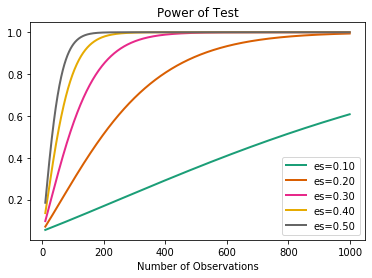

In [4]:
power_analysis.plot_power(dep_var='nobs', 
                    nobs=np.arange(10,1000), 
                    effect_size=np.arange(0.1,0.6,0.1))
plt.show()

### t-tests
We see that we have the required power (>0.8)

We now want to test this hypothesis using a t-test

In [5]:
# difference in means:
x1 = df.query("hospmi=='Yes'")['age1']
x2 = df.query("hospmi=='No'")['age1']

print(x1.mean()-x2.mean())

2.1905629468930528


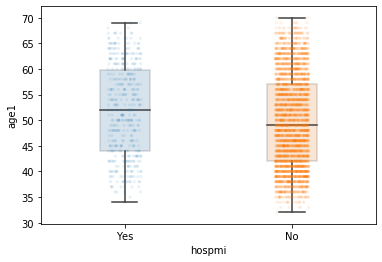

In [6]:
fig, ax = plt.subplots()

sns.boxplot(x="hospmi", y="age1", data=df, width=0.3, boxprops=dict(alpha=0.2))

# Add in points to show each observation
sns.stripplot(x="hospmi", y="age1", data=df, size=3, alpha=0.1)

plt.show(fig)

Visually it seams that there is a difference, let's check

In [7]:
scipy.stats.ttest_ind(x1, x2)

Ttest_indResult(statistic=5.110793325815549, pvalue=3.3431210634355005e-07)

Similarly we can use statsmodels:

In [8]:
sm.stats.ttest_ind(df.query("hospmi=='Yes'")['age1'], 
                     df.query("hospmi=='No'")['age1'])

(5.110793325815549, 3.3431210634355005e-07, 4432.0)

It seems that we can indeed reject $H_0$ at an $\alpha=0.05$

### $\chi^2$ (Chi square) test

We want to test whether two categorical features are independent 
Specifically we will test if hypertension and stroke are independent

$H_0$ - HTN and stroke are independent

$H_1$ - They are not independent

In [9]:
"""
first some basic probability:
if two random variables are independent then:
P(A|B) = P(B|A) = P(A,B)
"""
assert (not df.stroke.isna().any()) and (not df.hyperten.isna().any())

p_a = (df.stroke=="Yes").sum() / df.shape[0]
p_b = (df.hyperten=="Yes").sum() / df.shape[0]

p_ab = (df.query("hyperten=='Yes'&stroke=='Yes'").shape[0]/df.shape[0]) 
p_a_given_b = p_ab / p_b

print(p_a*p_b, p_a_given_b)

0.06864473868123243 0.11531365313653136


Doesn't seem like independence..

In [10]:
chi_table = df.groupby(["hyperten","stroke"]).\
               count()['death'].\
               unstack()
chi_table

stroke,No,Yes
hyperten,,
No,1142,40
Yes,2877,375


In [11]:
chi2, p, dof, expected = scipy.stats.chi2_contingency(chi_table)
print(f"p-value: {p:.2e}\nexpected freq.:")
pd.DataFrame(expected, index=['HTN:No', "HTN:Yes"],
            columns=['Stroke:No','Stroke:Yes'])

p-value: 2.90e-16
expected freq.:


,Stroke:No,Stroke:Yes
HTN:No,1071.370771,110.629229
HTN:Yes,2947.629229,304.370771


In [12]:
expected

array([[1071.37077131,  110.62922869],
       [2947.62922869,  304.37077131]])

In [13]:
total = chi_table.sum(1)
chi_table = (chi_table.T / total).T
chi_table['total'] = total
chi_table

stroke,No,Yes,total
hyperten,,,
No,0.966159,0.033841,1182
Yes,0.884686,0.115314,3252


## Machine Learning

What do we want to predict?

In the case of Framingham we can try to predict several things:
1. We can choose different parameters as targets - `death, anychd, mi_fchd` etc.
2. We can predict for different time ranges - in the next 2 years, by the end of the study etc.

    2.1 We can thus use all the data per patient, difference with previous meeting, single meeting as variables

In [14]:
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from lightgbm import LGBMClassifier

In [15]:
((df.loc[:,'timeap':"timedth"] < 5) & (df.loc[:,'timeap':"timedth"] > 0)).sum()

timeap      261
timemi      209
timemifc    216
timechd     284
timestrk    203
timecvd     267
timedth     177
dtype: int64

As it is very difficult to predict with this class imbalance we'll subsample the negatives:

In [16]:
df_pos = df.query("0<timemifc<5")
df_neg = df.loc[~df.index.isin(df_pos.index),:].sample(n=df_pos.shape[0]*2)
df = pd.concat((df_pos,df_neg))

print(df_pos.shape, df_neg.shape, df.shape)

(216, 74) (432, 74) (648, 74)


Due to the non-random missingness and the lack of time period values for the different exams we will choose to predict outcomes in the first 5 years

In [17]:
df.loc[:,"sex1":"prevhyp1"].isna().sum()

sex1          0
totchol1     10
age1          0
sysbp1        0
diabp1        0
cursmoke1     0
cigpday1      3
bmi1          8
diabetes1     0
bpmeds1      10
heartrte1     0
glucose1     59
prevchd1      0
prevap1       0
prevmi1       0
prevstrk1     0
prevhyp1      0
dtype: int64

In [18]:
from sklearn.metrics import roc_auc_score, roc_curve, plot_confusion_matrix
res = {}

def single_label_legend(ax):
    """
    Removes duplicated labels in the legend, keeps first
    :param ax:
    :return:
    """
    handles, labels = ax.get_legend_handles_labels()
    handle_list, label_list = [], []
    for handle, label in zip(handles, labels):
        if label not in label_list:
            handle_list.append(handle)
            label_list.append(label)
    ax.legend(handle_list, label_list)
    return ax

def get_metrics(res_cur, clf, X_test, y_test):
    #acc.
    res_cur['acc.'] = clf.score(X_test,y_test)
    
    #conf. table.

    #roc
    probas = clf.predict_proba(X_test)[:,1]
    res_cur['roc_curve'] = roc_curve(y_test,probas)
    res_cur['roc_auc'] = roc_auc_score(y_test,probas)
    return res_cur

def conf_matrix(clf):
    i=0
    X_train, y_train = cv[i]['train'][0], cv[i]['train'][1]
    X_test, y_test = cv[i]['test'][0], cv[i]['test'][1]

    clf.fit(X_train, y_train)
    plot_confusion_matrix(clf, X_test, y_test)

def plot_acc(res):
    acc_scores = [
    np.array([y['acc.'] for y in x.values()])[:,None] 
    for x in res.values()
    ]
    acc_labels = list(res.keys())

    acc_scores = np.hstack(acc_scores)
    acc_scores = pd.DataFrame(acc_scores, columns=acc_labels)
    
    display(acc_scores.describe().loc[['mean','std'],:].T)
    acc_scores.plot.box()
    plt.ylabel("Accuracy")
    
def plot_roc(res):
    mean_fpr = np.linspace(0,1,100)
    fig, ax = plt.subplots()
    
    for clf in res:
        fprs, tprs, aucs = [], [], []
        for i in res[clf]:
            fpr, tpr, _ = res[clf][i]['roc_curve']
            tpr = scipy.interp(mean_fpr, fpr, tpr)
            tpr[0] = 0.0
            
            tprs.append(tpr)
            fprs.append(fpr)
            aucs.append(res[clf][i]['roc_auc'])
        
        mean_tpr = np.mean(tprs, axis=0)
        mean_auc = np.mean(aucs)
        std_auc = np.std(aucs)

        label = f'{clf} ({mean_auc:0.2f} $\pm$ {std_auc:0.2f})'

        ax.plot(mean_fpr, mean_tpr, label=label,
                lw=2, alpha=.8)

        std_tpr = np.std(tprs, axis=0)
        tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
        tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
        ax.fill_between(mean_fpr, tprs_lower, tprs_upper, label=label, alpha=.15)

    ax.plot([0, 1], [0, 1], 'k--', lw=1)
    ax.set_xlim([min(mean_fpr), max(mean_fpr)])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc="lower right")
    ax = single_label_legend(ax)
    return fig,ax
    

In [19]:
def na_indicator(df, cols=None):
    if cols is None:
        cols = df.columns
        
    for col in cols:
        df[f"{col}_NA"] = df[col].isna().astype("int")
    return df

def preprocess(df, funcs={}):
    X = df.loc[:,"sex1":"prevhyp1"].copy()
    y = df.loc[:,'timemifc'].copy()

    #preproc y:
    y = (y>0) & (y<5)

    #categorize
    X['male'] = ["Yes" if x=="Male" else "No" for x in X['sex1']]
    X['female'] = ["Yes" if x=="Female" else "No" for x in X['sex1']]    
    X.drop(columns=["sex1"], inplace=True)

    binary_columns = ["male","female","cursmoke1", "diabetes1","bpmeds1", 
                      "prevchd1","prevap1","prevmi1",
                      "prevstrk1", "prevhyp1"]
    X.loc[:,binary_columns] = (X.loc[:,binary_columns]=="Yes").astype(int)

    ##### impute missing #####
    non_binary_columns = X.columns[~X.columns.isin(binary_columns)]
    if not "imputer" in funcs:
        imputer = KNNImputer(n_neighbors=5)
        funcs['imputer'] = imputer

    X = na_indicator(X, non_binary_columns)
    X.loc[:,non_binary_columns] = funcs['imputer'].fit_transform(X.loc[:,non_binary_columns])
    
    return X,y,funcs
    

### Train / Test splits
We will use a K-fold Cross Validation where k=5.

i.e. we split the data into 5 parts, each time we train on 4/5 and test on 1/5:
![https://i.stack.imgur.com/1fXzJ.png](https://i.stack.imgur.com/1fXzJ.png)

In [20]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_orig = {i:{"train":train_idx, 
         "test":test_idx} 
      for i,(train_idx, test_idx) 
      in enumerate(cv.split(df, (df['timemifc']<5) & (df['timemifc']>0)))}

cv = {i:{"train":df.iloc[v['train'],:].copy(), 
         "test":df.iloc[v['test'],:].copy()} 
      for i,v 
      in cv_orig.items()}

for i in cv_orig:
    cv[i]['train'] = preprocess(cv[i]['train'])
    cv[i]['test'] = preprocess(cv[i]['test'], funcs=cv[i]['train'][2])
    
def train_clf(clf, res, name):
    res[name] = {}
    for i in cv:
        res[name][i] = {}
        res_cur = res[name][i]
        
        X_train, y_train = cv[i]['train'][0], cv[i]['train'][1]
        X_test, y_test = cv[i]['test'][0], cv[i]['test'][1]
        
        #train dummy
        clf.fit(X_train, y_train)
        
        res_cur = get_metrics(res_cur, clf, X_test, y_test)
    return res

### Dummy classifiers

In [21]:
from sklearn.dummy import DummyClassifier

for strategy in ["most_frequent", "stratified"]:
    clf = DummyClassifier(strategy=strategy)
    res = train_clf(clf, res, f'dummy_{strategy}')

,mean,std
dummy_most_frequent,0.666667,0.003140
dummy_stratified,0.551008,0.052852


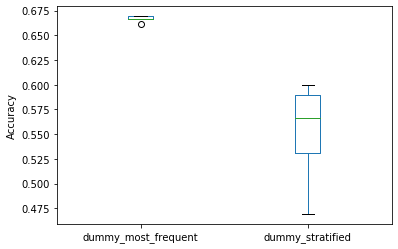

In [22]:
plot_acc(res)

We can see that the dummy clussifiers achieve a pretty good accuracy..

This is because most of the people didn't have the event! just predicting `FALSE` for everybody gets us pretty good accuracy..

### Simple linear models

#### Logistic Regression - Age and Sex only

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import StandardScaler, MinMaxScaler

name = "age_sex_lr"
clf =  Pipeline([('transform', ColumnTransformer([("age", MinMaxScaler(), ['age1']),
                                               ("sex", "passthrough", ['male','female'])],
                                                 remainder='drop')
                 ),
               ('lr', LogisticRegression(penalty='none'))])

res = train_clf(clf, res, name)

,mean,std
dummy_most_frequent,0.666667,0.003140
dummy_stratified,0.551008,0.052852
age_sex_lr,0.685247,0.037607


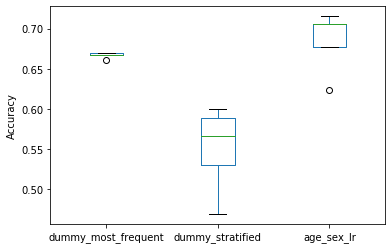

In [24]:
plot_acc(res)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2bc1d503d0>)

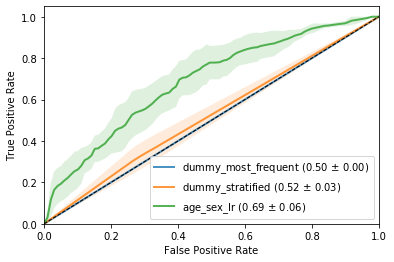

In [25]:
plot_roc(res)

#### Logistic Regression - Age, Sex and previous diseases

In [26]:
name = "age_sex_diseases_lr"
clf =  Pipeline([('transform', ColumnTransformer([("age", MinMaxScaler(), ['age1']),
                                                  ("sex", "passthrough", ['male','female']),
                                                  ('diseases', 'passthrough', ["cursmoke1","diabetes1","bpmeds1",
                                                                               "prevchd1","prevap1","prevmi1","prevstrk1",
                                                                               "prevhyp1"])],
                                                 remainder='drop')
                 ),
               ('lr', LogisticRegression(penalty='none'))])

res = train_clf(clf, res, name)

,mean,std
dummy_most_frequent,0.666667,0.003140
dummy_stratified,0.551008,0.052852
age_sex_lr,0.685247,0.037607
age_sex_diseases_lr,0.683709,0.027895


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2bc1b74350>)

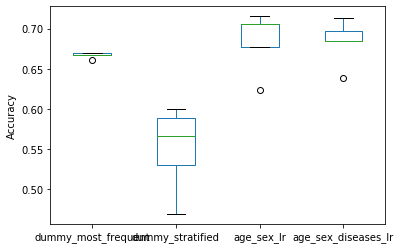

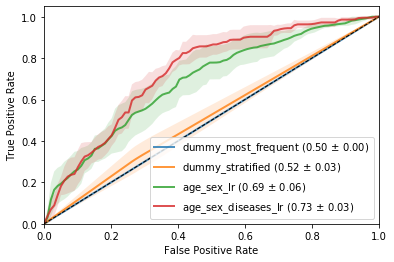

In [27]:
plot_acc(res)
plot_roc(res)

In [28]:
name = "all_lr"
clf =  Pipeline([('transform', ColumnTransformer([("age", MinMaxScaler(), ['age1']),
                                                  ("sex", "passthrough", ['male','female']),
                                                  ('diseases', 'passthrough', ["cursmoke1","diabetes1","bpmeds1",
                                                                               "prevchd1","prevap1","prevmi1","prevstrk1",
                                                                               "prevhyp1"])],
                                                 remainder=StandardScaler())
                 ),
               ('lr', LogisticRegression(penalty='none'))])

res = train_clf(clf, res, name)

/home/doron/miniconda3/envs/HackathonHarap/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/doron/miniconda3/envs/HackathonHarap/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scik

,mean,std
dummy_most_frequent,0.666667,0.003140
dummy_stratified,0.551008,0.052852
age_sex_lr,0.685247,0.037607
age_sex_diseases_lr,0.683709,0.027895
all_lr,0.696017,0.024832


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2bc1a005d0>)

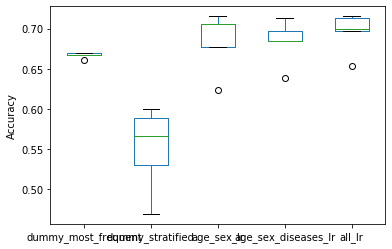

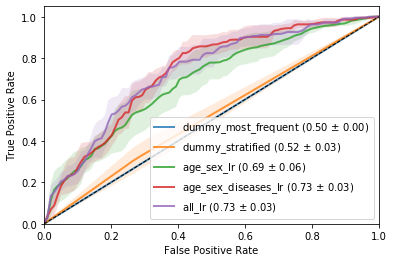

In [29]:
plot_acc(res)
plot_roc(res)

How can is be that the accuracy is decreasing (on avg.) but the ROC is increasing?

It all has to do with the imbalance..


/home/doron/miniconda3/envs/HackathonHarap/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


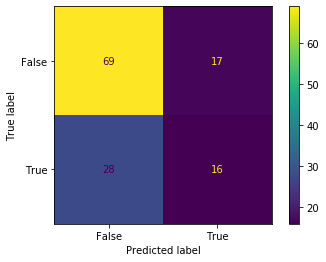

In [30]:
conf_matrix(clf)

Let's try to rebalance by giving higher class weight to the logistic regression (i.e. making positives more important to predict)

In [31]:
name = "all_blanced_lr"
clf =  Pipeline([('transform', ColumnTransformer([("age", MinMaxScaler(), ['age1']),
                                                  ("sex", "passthrough", ['male','female']),
                                                  ('diseases', 'passthrough', ["cursmoke1","diabetes1","bpmeds1",
                                                                               "prevchd1","prevap1","prevmi1","prevstrk1",
                                                                               "prevhyp1"])],
                                                 remainder=StandardScaler())
                 ),
               ('lr', LogisticRegression(penalty='none', class_weight='balanced'))])

res = train_clf(clf, res, name)

/home/doron/miniconda3/envs/HackathonHarap/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/doron/miniconda3/envs/HackathonHarap/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scik

,mean,std
dummy_most_frequent,0.666667,0.003140
dummy_stratified,0.551008,0.052852
age_sex_lr,0.685247,0.037607
age_sex_diseases_lr,0.683709,0.027895
all_lr,0.696017,0.024832
all_blanced_lr,0.678951,0.040457


/home/doron/miniconda3/envs/HackathonHarap/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


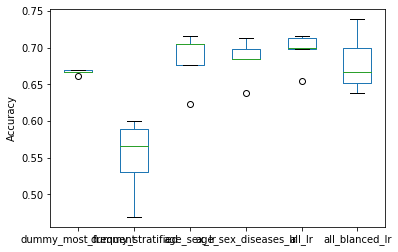

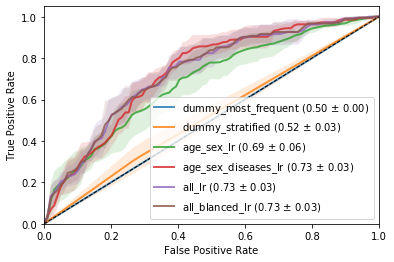

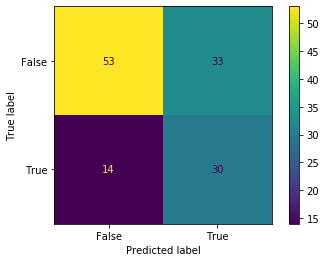

In [32]:
plot_acc(res)
plot_roc(res)
conf_matrix(clf)

The accuracy drop substantially as we now have many FP, let's see how other models fair:

In [33]:
for model_name, model in zip(["lasso", "rf", "lgbm"], 
                             [LogisticRegression(penalty="l1", C=10, solver="saga"), 
                              RandomForestClassifier(), 
                              LGBMClassifier(class_weight = "balanced")]):
    clf =  Pipeline([('transform', ColumnTransformer([("age", MinMaxScaler(), ['age1']),
                                                  ("sex", "passthrough", ['male','female']),
                                                  ('diseases', 'passthrough', ["cursmoke1","diabetes1","bpmeds1",
                                                                               "prevchd1","prevap1","prevmi1","prevstrk1",
                                                                               "prevhyp1"])],
                                                 remainder=StandardScaler())
                 ),
               ('clf', model)])

    res = train_clf(clf, res, model_name)

/home/doron/miniconda3/envs/HackathonHarap/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/doron/miniconda3/envs/HackathonHarap/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/doron/miniconda3/envs/HackathonHarap/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/doron/miniconda3/envs/HackathonHarap/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/doron/miniconda3/envs/Hackatho

,mean,std
dummy_most_frequent,0.666667,0.003140
dummy_stratified,0.551008,0.052852
age_sex_lr,0.685247,0.037607
age_sex_diseases_lr,0.683709,0.027895
all_lr,0.696017,0.024832
all_blanced_lr,0.678951,0.040457
lasso,0.696005,0.028892
rf,0.703685,0.020365
lgbm,0.685236,0.036115


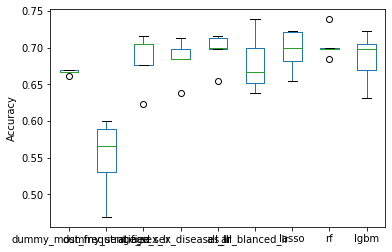

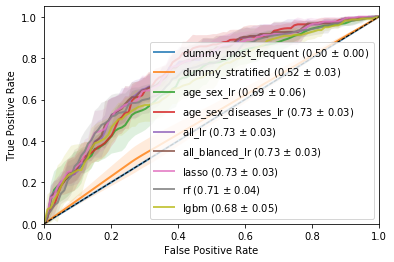

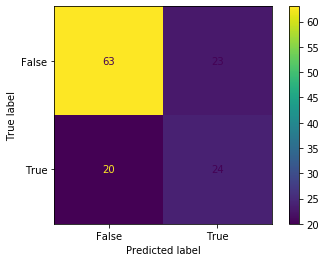

In [34]:
plot_acc(res)
plot_roc(res)
conf_matrix(clf)

### How well can we do by having better features?

In [35]:
from sklearn.preprocessing import KBinsDiscretizer
def preprocess_extended(df, funcs={}):
    X, y, funcs = preprocess(df, funcs)
    
    ### Feature engineering ###
    if not 'cig_discrete' in funcs:
        funcs['cig_discrete'] = KBinsDiscretizer(n_bins = 5, encode="quantile")
        funcs['cig_discrete'].fit(X['cigpday1'])
    X_ =  cig_discrete.transform(X['cigpday1'])
    X_ = pd.DataFrame(X_, columns=[f'cig_quant{i}' for i in range(X_.shape[0])], index=X.index)
    X = X.join(X_)
    
    
    X['obese'] = (X['bmi1']>30).astype(int)
    X['anyevent'] = (X.loc[:,'prevchd1':'prevhyp1'].sum(1)>0).astype(int)
    
    return X,y,funcs
    
cv = {i:{"train":df.iloc[v['train'],:].copy(), 
         "test":df.iloc[v['test'],:].copy()} 
      for i,v 
      in cv_orig.items()}

for i in cv_orig:
    cv[i]['train'] = preprocess(cv[i]['train'])
    cv[i]['test'] = preprocess(cv[i]['test'], funcs=cv[i]['train'][2])

In [36]:
name = "ext._feats_lr"
clf =  Pipeline([('transform', ColumnTransformer([("age", MinMaxScaler(), ['age1']),
                                                  ("sex", "passthrough", ['male','female']),
                                                  ('diseases', 'passthrough', ["cursmoke1","diabetes1","bpmeds1",
                                                                               "prevchd1","prevap1","prevmi1","prevstrk1",
                                                                               "prevhyp1"])],
                                                 remainder=StandardScaler())
                 ),
               ('lr', LogisticRegression(penalty='l1', C=10, solver="saga"))])

res = train_clf(clf, res, name)

/home/doron/miniconda3/envs/HackathonHarap/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/doron/miniconda3/envs/HackathonHarap/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/doron/miniconda3/envs/HackathonHarap/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/doron/miniconda3/envs/HackathonHarap/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/doron/miniconda3/envs/Hackatho

,mean,std
dummy_most_frequent,0.666667,0.003140
dummy_stratified,0.551008,0.052852
age_sex_lr,0.685247,0.037607
age_sex_diseases_lr,0.683709,0.027895
all_lr,0.696017,0.024832
all_blanced_lr,0.678951,0.040457
lasso,0.696005,0.028892
rf,0.703685,0.020365
lgbm,0.685236,0.036115
ext._feats_lr,0.696005,0.028892


/home/doron/miniconda3/envs/HackathonHarap/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


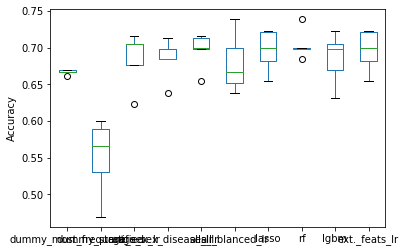

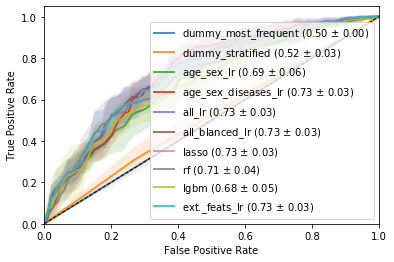

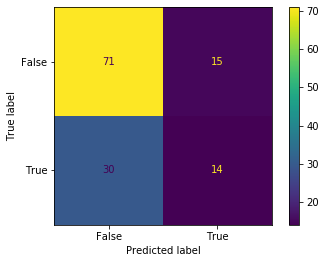

In [37]:
plot_acc(res)
plot_roc(res)
conf_matrix(clf)